In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import csv

In [2]:
row_start = 14

In [3]:
# metadata = dict()
filename = "1B - Xing - new.CSV"
with open(filename, newline='') as csvfile:
    reader = csv.reader(csvfile)

In [4]:
data = pd.read_csv(filename, delimiter=",", header=row_start)
data

,TIME,CH1,CH1 Peak Detect,CH2,CH2 Peak Detect
0,-2.00000,9.88,10.04,1.224,1.240
1,-1.99997,9.88,9.80,1.216,1.184
2,-1.99994,9.88,9.96,1.208,1.240
3,-1.99990,9.88,9.80,1.216,1.192
4,-1.99987,9.88,10.04,1.216,1.240
...,...,...,...,...,...
124995,1.99984,0.04,-0.04,0.104,0.080
124996,1.99987,0.12,0.20,0.104,0.128
124997,1.99990,0.04,-0.04,0.104,0.072
124998,1.99994,0.12,0.20,0.104,0.136


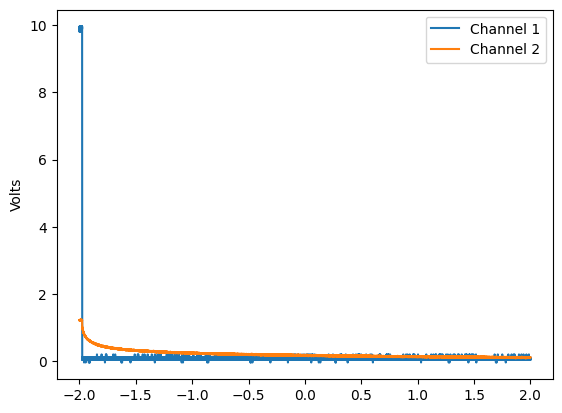

In [5]:
t_raw = data["TIME"]
ch1_raw = data["CH1"]
ch2_raw = data["CH2"]
plt.plot(
    t_raw, 
    ch1_raw,
    label="Channel 1"
)
plt.plot(
    t_raw, 
    ch2_raw,
    label="Channel 2"
)
plt.ylabel("Volts")
plt.legend()


Text(0.5, 0, 'Time (s)')

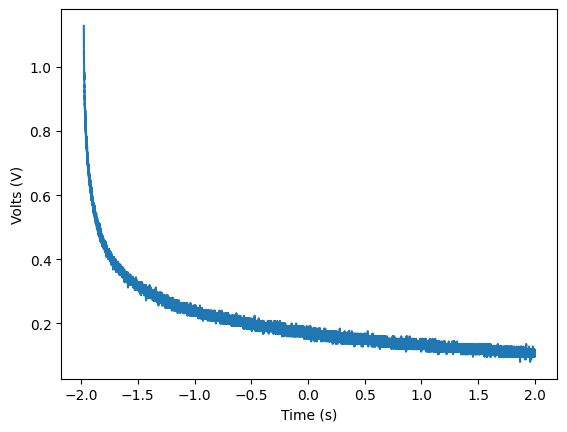

In [6]:
t = t_raw[ch1_raw < 1]
ch2_noisy = ch2_raw[ch1_raw < 1]
plt.plot(t, ch2_noisy)
plt.ylabel("Volts (V)")
plt.xlabel("Time (s)")

In [7]:
from scipy import signal

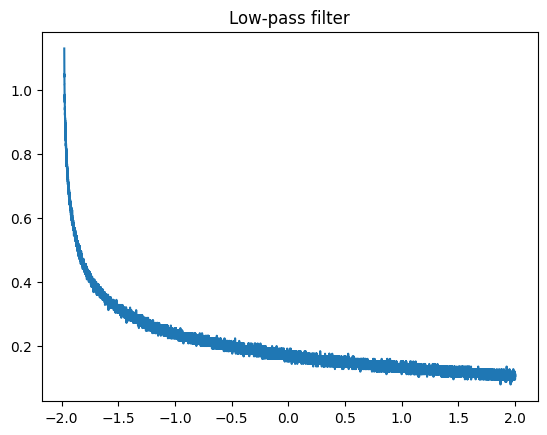

In [8]:
sample_frequency = 2e8
cutoff_frequency = 1e6
b, a = signal.butter(1, 2*cutoff_frequency/sample_frequency)
#ch2 = signal.filtfilt(b, a, ch2_noisy)
ch2 = ch2_noisy
plt.plot(t, ch2)
plt.title("Low-pass filter")
plt.show()

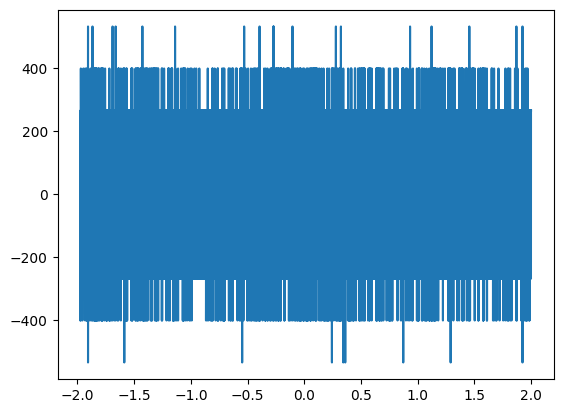

In [9]:
dt = np.array(t)[1] - np.array(t)[0]
dch2dt = np.gradient(ch2, dt)
plt.plot(t, dch2dt)

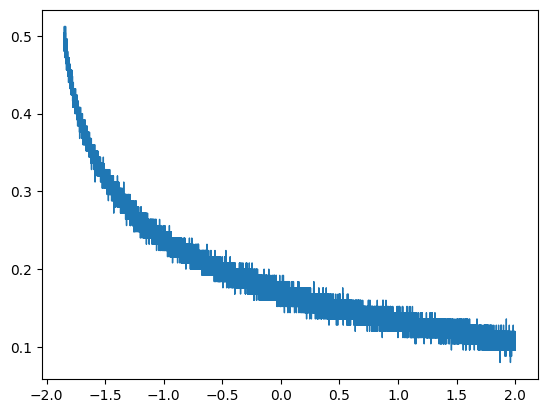

In [10]:
t_truncated = t[t>-1.85]
ch2_truncated = ch2[t>-1.85]
plt.plot(t_truncated, ch2_truncated,lw=1)

In [11]:
model = lambda t, A, RC, z: A * np.exp(-t/RC) + z
[A_model, RC_model, z_model], cov = sp.optimize.curve_fit(model, t, ch2)
cov

array([[ 5.02163540e-09,  6.39205995e-08, -5.97053229e-09],
       [ 6.39205995e-08,  8.28876077e-07, -7.07084718e-08],
       [-5.97053229e-09, -7.07084718e-08,  1.69872267e-08]])

Text(0.5, 1.0, "Voltage vs. Time for Xing's Capacitor")

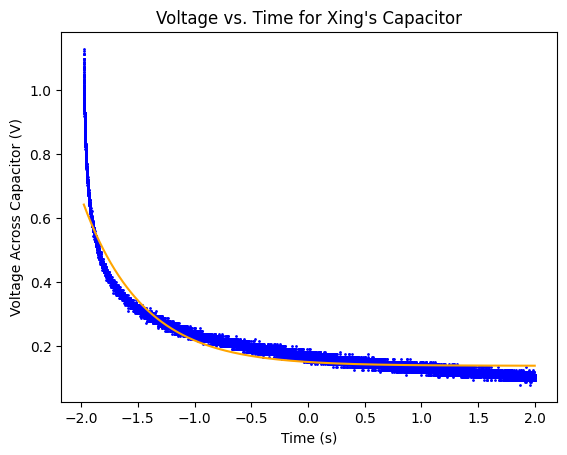

In [28]:
plt.scatter(t, ch2, c='blue', s=1)
plt.plot(t, model(t, A_model, RC_model, z_model), c='orange')
plt.xlabel("Time (s)")
plt.ylabel("Voltage Across Capacitor (V)")
plt.title("Voltage vs. Time for Xing's Capacitor")

Text(0.5, 1.0, "Voltage vs. Time Residual for Xing's Capacitor")

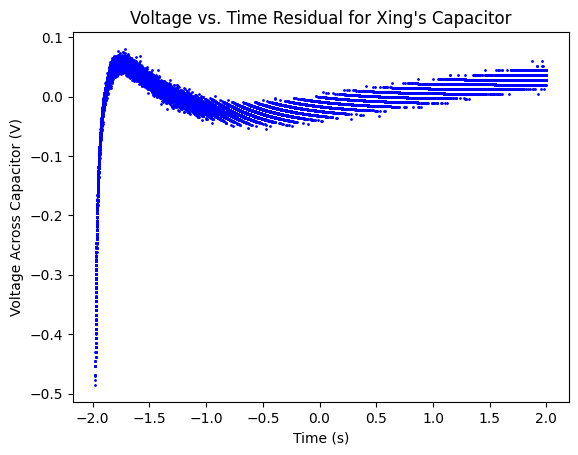

In [29]:
residual = model(t, A_model, RC_model, z_model) - ch2
plt.scatter(t, residual, c='blue', s=1)
plt.xlabel("Time (s)")
plt.ylabel("Voltage Across Capacitor (V)")
plt.title("Voltage vs. Time Residual for Xing's Capacitor")

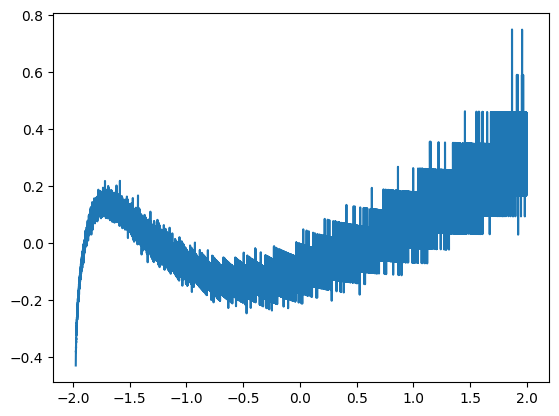

In [14]:
plt.plot(t, residual / ch2)

In [15]:
model_truncated = lambda t_truncated, A, RC, z: A * np.exp(-t_truncated/RC) + z
[A_model_truncated, RC_model_truncated, z_model_truncated], cov_truncated = sp.optimize.curve_fit(model_truncated, t_truncated, ch2_truncated)
cov_truncated

array([[ 8.58321018e-09,  9.45845976e-08, -6.84520101e-09],
       [ 9.45845976e-08,  1.08764495e-06, -7.17331964e-08],
       [-6.84520101e-09, -7.17331964e-08,  6.88795925e-09]])

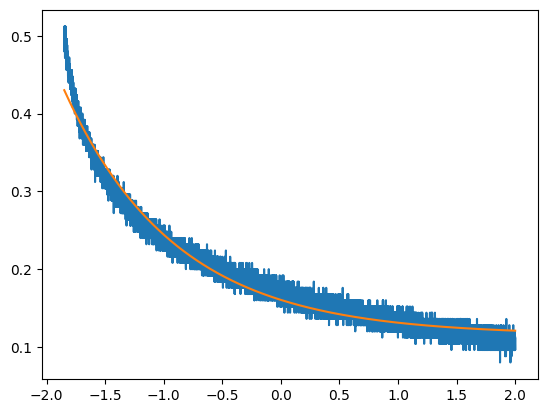

In [16]:
plt.plot(t_truncated, ch2_truncated)
plt.plot(t_truncated, model(t_truncated, A_model_truncated, RC_model_truncated, z_model_truncated))

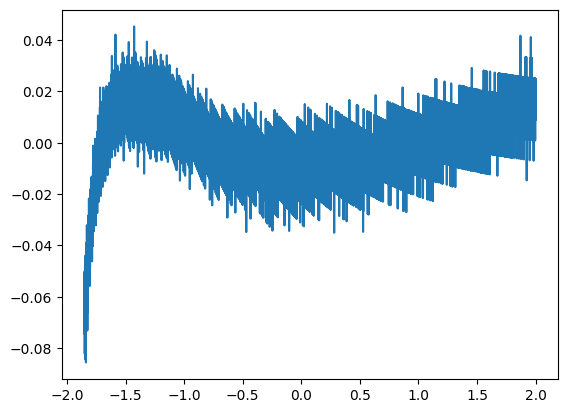

In [17]:
residual_truncated = model_truncated(t_truncated, A_model_truncated, RC_model_truncated, z_model_truncated) - ch2_truncated
plt.plot(t_truncated, residual_truncated)

In [18]:
t_trunc = np.array(t_truncated[residual_truncated == np.max(residual_truncated)])[0]

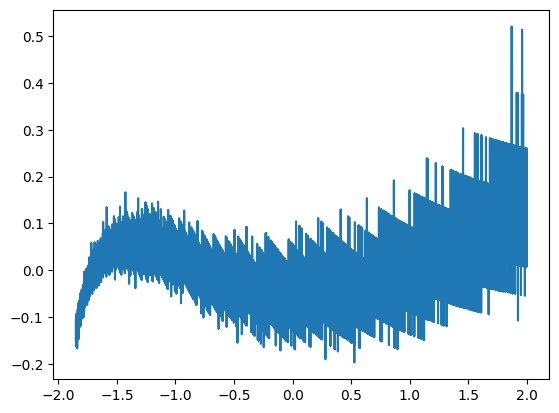

In [19]:
plt.plot(t_truncated, residual_truncated / ch2_truncated)

In [20]:
t_truncated2 = t[t>t_trunc]
ch2_truncated2 = ch2[t>t_trunc]
model_truncated2 = lambda t_truncated2, A, RC, z: A * np.exp(-t_truncated2/RC) + z
[A_model_truncated2, RC_model_truncated2, z_model_truncated2], cov_truncated2 = sp.optimize.curve_fit(model_truncated2, t_truncated2, ch2_truncated2)
cov_truncated2

array([[ 1.45917700e-08,  2.39710732e-07, -1.24006366e-08],
       [ 2.39710732e-07,  4.13993402e-06, -2.01769664e-07],
       [-1.24006366e-08, -2.01769664e-07,  1.08217303e-08]])

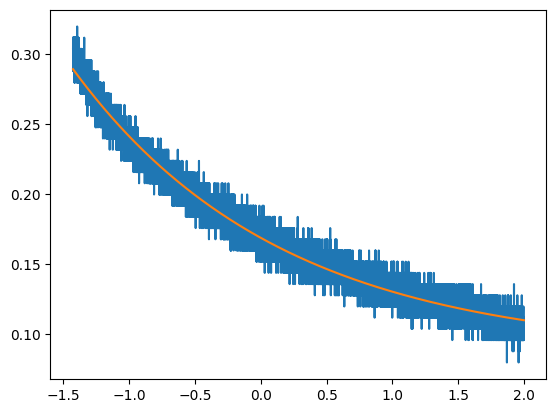

In [21]:
plt.plot(t_truncated2, ch2_truncated2)
plt.plot(t_truncated2, model(t_truncated2, A_model_truncated2, RC_model_truncated2, z_model_truncated2))

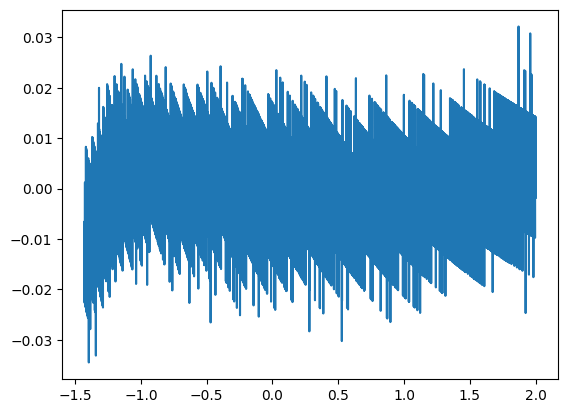

In [22]:
residual_truncated2 = model_truncated2(t_truncated2, A_model_truncated2, RC_model_truncated2, z_model_truncated2) - ch2_truncated2
plt.plot(t_truncated2, residual_truncated2)

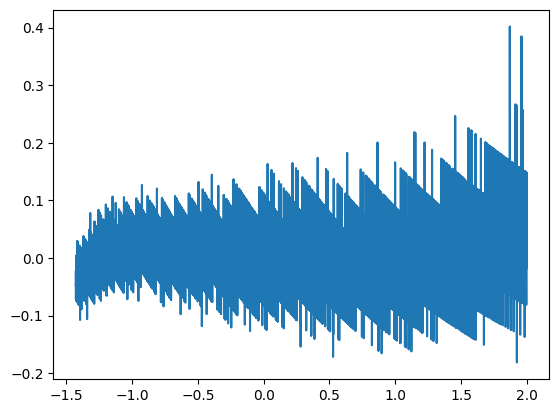

In [23]:
plt.plot(t_truncated2, residual_truncated2 / ch2_truncated2)

In [30]:
v_0 = 10
A_error = np.sqrt(cov[0,0]/t.size)
A_error_truncated = np.sqrt(cov_truncated[0,0]/t_truncated.size)
A_error_truncated2 = np.sqrt(cov_truncated2[0,0]/t_truncated2.size)
B_error = np.sqrt(cov[1,1]/t.size)
B_error_truncated = np.sqrt(cov_truncated[1,1]/t_truncated.size)
B_error_truncated2 = np.sqrt(cov_truncated2[1,1]/t_truncated2.size)
print("A:", A_model / v_0, "+-", A_error / v_0)
print("A-Truncated:", A_model_truncated / v_0, "+-", A_error_truncated / v_0)
print("A-Truncated2:", A_model_truncated2 / v_0, "+-", A_error_truncated2 / v_0)
print("B:", RC_model, "+-", B_error)
print("B-Truncated:", RC_model_truncated, "+-", B_error_truncated)
print("B-Truncated2:", RC_model_truncated2, "+-", B_error_truncated2)
z_error = np.sqrt(cov[2,2]/t.size)
print("z:", z_model, "+-", z_error)

A: 0.0011884817337634427 +- 2.0102816761561654e-08
A-Truncated: 0.004506014735659668 +- 2.670978550986373e-08
A-Truncated2: 0.00818882920569663 +- 3.690991392630491e-08
B: 0.5277236026526931 +- 2.5827307179497825e-06
B-Truncated: 0.9518274779702378 +- 3.0066931028892267e-06
B-Truncated2: 1.57763709461135 +- 6.217069962478802e-06
z: 0.1396777033557525 +- 3.6973925932127e-07


In [25]:
chi_squared = ((model(t, A_model, RC_model, z_model) - ch2)**2 / (0.004**2)).sum()
chi_squared_reduced = chi_squared / (t.size - 3)
print(chi_squared_reduced)

62.521204335790905


In [26]:
chi_squared_truncated = ((model_truncated(t_truncated, A_model_truncated, RC_model_truncated, z_model_truncated) - ch2_truncated)**2 / (0.004**2)).sum()
chi_squared_reduced_truncated = chi_squared_truncated / (t_truncated.size - 3)
print(chi_squared_reduced_truncated)

8.47535566812258


In [27]:
chi_squared_truncated2 = ((model_truncated2(t_truncated2, A_model_truncated2, RC_model_truncated2, z_model_truncated2) - ch2_truncated2)**2 / (0.004**2)).sum()
chi_squared_reduced_truncated2 = chi_squared_truncated2 / (t_truncated2.size - 3)
print(chi_squared_reduced_truncated2)

1.770389536500738
